In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf
import seaborn as sns
#for refering time
import time
from datetime import datetime

In [3]:
#use poloniex to simulating the bit data
import poloniex

In [4]:
plt.rcParams['figure.figsize'] = 15, 6

In [5]:
polo = poloniex.Poloniex()
chart_data = polo.returnChartData('BTC_ETH',period=polo.DAY,start=time.time()-polo.DAY*100,end=time.time())

In [6]:
df = pd.DataFrame(chart_data)

In [7]:
df

,date,high,low,open,close,volume,quoteVolume,weightedAverage
0,1586880296,0.02305386,0.02305386,0.02305386,0.02305386,0,0,0.02305386
1,1586908800,0.02339002,0.02285506,0.02306,0.02307045,295.68040053,12762.76113399,0.02316743
2,1586995200,0.02472232,0.0229,0.02306201,0.02425957,1184.62771453,49594.48674606,0.02388627
3,1587081600,0.02446898,0.02388471,0.02426174,0.02427407,562.86939037,23294.93407392,0.02416273
4,1587168000,0.02601442,0.02427493,0.02427546,0.02586461,819.18293344,32612.63057268,0.02511857
...,...,...,...,...,...,...,...,...
96,1595116800,0.026,0.02554557,0.02570499,0.02594502,55.4837758,2157.07916565,0.02572171
97,1595203200,0.0260424,0.02557828,0.02596037,0.02576301,53.79235193,2078.34160029,0.02588234
98,1595289600,0.02628585,0.025736,0.025752,0.02615097,153.05453739,5888.18413597,0.0259935
99,1595376000,0.0283,0.02600001,0.02615099,0.02772602,182.60066978,6789.65411202,0.02689395


In [8]:
df_f = df.astype('float')

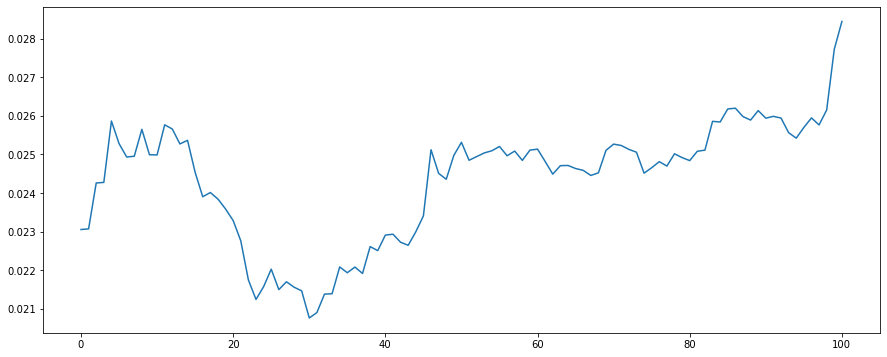

In [9]:
close_f = df_f['close']
close_f.plot()

In [10]:
# 短期線：窓幅1日（5分×12×24）
data_s_sma = pd.Series.rolling(df['close'],6).mean() 

#長期線：窓幅5日(5分x１２ｘ２４ｘ５)
data_l_sma = pd.Series.rolling(df['close'], 15).mean() 

In [11]:
data_s_std = pd.Series.rolling(df['close'], 6).std()
data_l_std = pd.Series.rolling(df['close'], 15).std() 

In [12]:
#make bollinger-band
df_1sigmaup_s =data_s_sma + data_s_std
df_1sigmadown_s =data_s_sma-data_s_std

In [13]:
df_2sigmaup_s =data_s_sma + 2*data_s_std
df_2sigmadown_s =data_s_sma-2*data_s_std

In [14]:
data_s_f = data_s_sma.astype('float')
data_l_f = data_l_sma.astype('float')

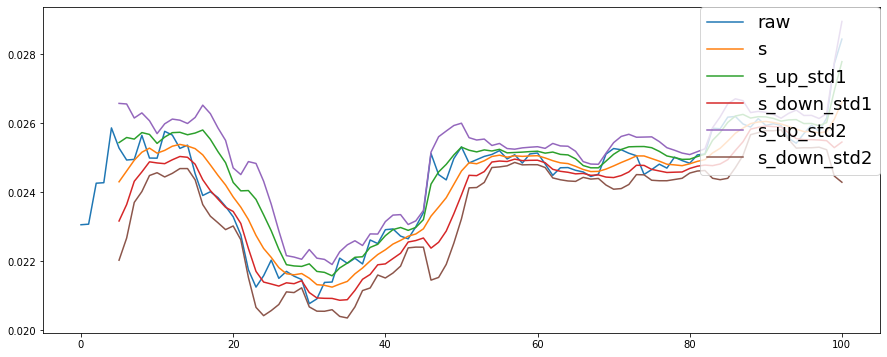

In [15]:
plt.plot(df_f['close'], label="raw")
plt.plot(data_s_f, label="s")  # 短期線
#plt.plot(data_l_f, label='l')  # 長期線
plt.plot(df_1sigmaup_s,label="s_up_std1")
plt.plot(df_1sigmadown_s,label="s_down_std1")
plt.plot(df_2sigmaup_s,label="s_up_std2")
plt.plot(df_2sigmadown_s,label="s_down_std2")
plt.legend(bbox_to_anchor=(1, 1), loc='upper right', borderaxespad=0, fontsize=18)
plt.show()

In [16]:
H = df_f["high"]
C = df_f["close"]
L = df_f["low"]

In [17]:
P = (H+L+C)/3
B1 = P*2-H
B2 = P-(H-L)
B3 = B1-(H-L)
S1 = P*2-L
S2 = P+(H-L)
S3 = S1+(H-L)
HBOP = 2*P-2*L+H
LBOP = 2*P-2*H+L

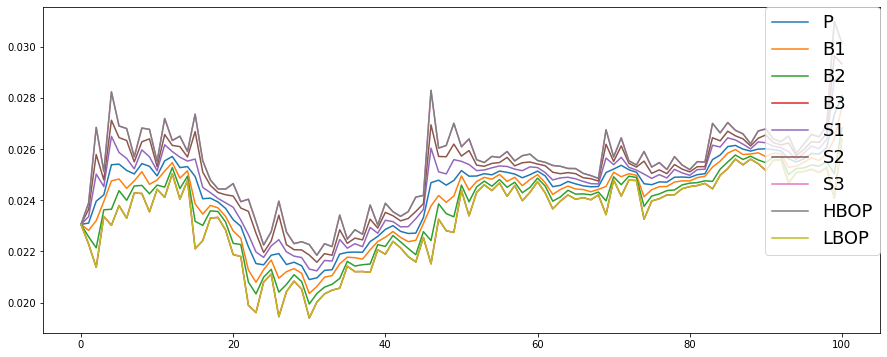

In [18]:
plt.plot(P,label="P")
plt.plot(B1,label="B1")
plt.plot(B2,label="B2")
plt.plot(B3,label="B3")
plt.plot(S1,label="S1")
plt.plot(S2,label="S2")
plt.plot(S3,label="S3")
plt.plot(HBOP,label="HBOP")
plt.plot(LBOP,label="LBOP")
plt.legend(bbox_to_anchor=(1, 1), loc='upper right', borderaxespad=0, fontsize=18)
plt.show()